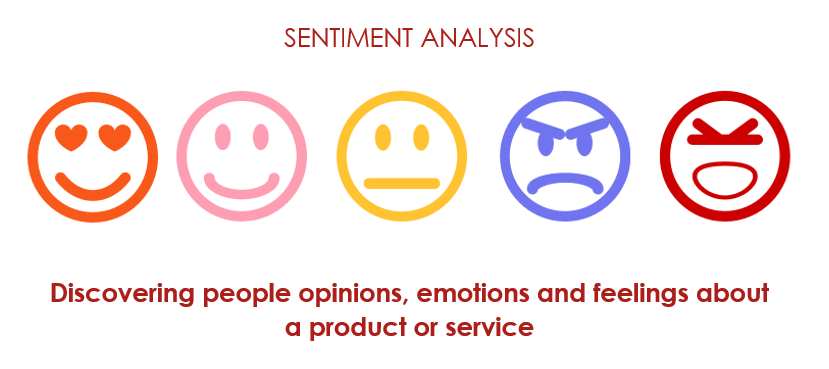

In [1]:
from PIL import Image
img = Image.open('Words.png')
img

### What is sentiment analysis?
**Sentiment analysis is a technique that detects the underlying sentiment in a piece of text.**

**It is the process of classifying text as either positive, negative, or neutral. Machine learning techniques are used to evaluate a piece of text and determine the sentiment behind it.**


### Why is sentiment analysis useful?
**Sentiment analysis is essential for businesses to gauge customer response.**

**Picture this: Your company has just released a new product that is being advertised on a number of different channels.
In order to gauge customer’s response to this product, sentiment analysis can be performed.**


### Loading data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Context**

**The objective of this task is to detect hate speech in tweets. For the sake of simplicity, we say a tweet contains hate speech if it has a racist or sexist sentiment associated with it. So, the task is to classify racist or sexist tweets from other tweets.**

**Formally, given a training sample of tweets and labels, where label '1' denotes the tweet is racist/sexist and label '0' denotes the tweet is not racist/sexist, your objective is to predict the labels on the test dataset.**

In [3]:
train =  pd.read_csv("train.csv")
train.head()

id  label                                              tweet
0   1      0   @user when a father is dysfunctional and is s...
1   2      0  @user @user thanks for #lyft credit i can't us...
2   3      0                                bihday your majesty
3   4      0  #model   i love u take with u all the time in ...
4   5      0             factsguide: society now    #motivation

In [4]:
train.shape

(31962, 3)

In [39]:
train.tweet[31947]

"@user @user you don't have the balls to hashtag me as a  but you say i am to weasel away.. lumpy tony.. dipshit."

### Basic Exploratory Data Analysis(EDA):

C:\Users\Krishna Vamshi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


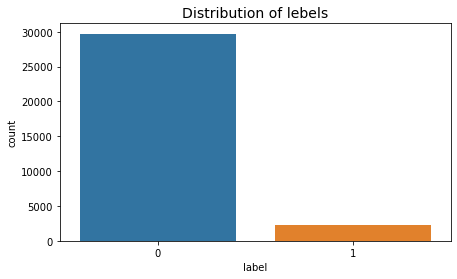

In [6]:
#countplot
plt.rcParams['figure.figsize'] = (7, 4)
sns.countplot('label', data=train)
plt.title("Distribution of lebels", fontsize = 14)
plt.show()

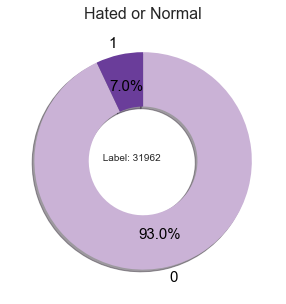

In [7]:
plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize']= (5, 5)
sorted_counts = train['label'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False, wedgeprops = {'width' : 0.5},
autopct='%1.1f%%', pctdistance = 0.7, textprops = {'color': 'black', 'fontsize' : 15}, shadow = True,
colors = sns.color_palette("Paired")[8:])
plt.text(x = -0.40, y = 0, s = ' Label: {}'.format(train.shape[0]))
plt.title('Hated or Normal', fontsize = 16);

***They are more positive tweets in data than racist tweets. The target is higly baised(highly imbalnced)***

In [28]:
train['length'] = train['tweet'].apply(len)
train.head(20)

id  label                                              tweet  length  \
0    1      0   @user when a father is dysfunctional and is s...     102   
1    2      0  @user @user thanks for #lyft credit i can't us...     122   
2    3      0                                bihday your majesty      21   
3    4      0  #model   i love u take with u all the time in ...      86   
4    5      0             factsguide: society now    #motivation      39   
5    6      0  [2/2] huge fan fare and big talking before the...     116   
6    7      0   @user camping tomorrow @user @user @user @use...      74   
7    8      0  the next school year is the year for exams.ð...     143   
8    9      0  we won!!! love the land!!! #allin #cavs #champ...      87   
9   10      0   @user @user welcome here !  i'm   it's so #gr...      50   
10  11      0   â #ireland consumer price index (mom) climb...     111   
11  12      0  we are so selfish. #orlando #standwithorlando ...     133   
12  13      0  i get to see my daddy today!!   #80days #getti...      51   
13  14      1  @user #cnn calls #michigan middle school 'buil...      74   
14  15      1  no comment!  in #australia   #opkillingbay #se...     101   
15  16      0  ouch...junior is angryð#got7 #junior #yugyo...      56   
16  17      0  i am thankful for having a paner. #thankful #p...      58   
17  18      1                             retweet if you agree!       22   
18  19      0  its #friday! ð smiles all around via ig use...      78   
19  20      0  as we all know, essential oils are not made of...      58   

                                          clean_tweet  
0   father dysfunct selfish drag hi kid hi dysfunc...  
1   thank lyft credit use caus offer wheelchair va...  
2                                      bihday majesti  
3                         model love u take u time ur  
4                             factsguid societi motiv  
5   2 2 huge fan fare big talk befor leav chao pay...  
6                                 camp tomorrow danni  
7   next school year year exam think school exam h...  
8   love land allin cav champion cleveland clevela...  
9                                          welcom gr8  
10  ireland consum price index mom climb previou 0...  
11  selfish orlando standwithorlando pulseshoot or...  
12                 get see daddi today 80day gettingf  
13  cnn call michigan middl school build wall chan...  
14  comment australia opkillingbay seashepherd hel...  
15          ouch junior angri got7 junior yugyoem omg  
16                            thank paner thank posit  
17                                       retweet agre  
18   friday smile around via ig user cooki make peopl  
19                       know essenti oil made chemic

In [36]:
train[train['length']==104]['tweet'].iloc[0]

"it's unbelievable that in the 21st century we'd need something like this. again. #neverump  #xenophobia "

In [34]:
train[(train.label == 1)]

id  label                                              tweet  \
13        14      1  @user #cnn calls #michigan middle school 'buil...   
14        15      1  no comment!  in #australia   #opkillingbay #se...   
17        18      1                             retweet if you agree!    
23        24      1    @user @user lumpy says i am a . prove it lumpy.   
34        35      1  it's unbelievable that in the 21st century we'...   
...      ...    ...                                                ...   
31934  31935      1  lady banned from kentucky mall. @user  #jcpenn...   
31946  31947      1  @user omfg i'm offended! i'm a  mailbox and i'...   
31947  31948      1  @user @user you don't have the balls to hashta...   
31948  31949      1   makes you ask yourself, who am i? then am i a...   
31960  31961      1  @user #sikh #temple vandalised in in #calgary,...   

       length                                        clean_tweet  
13         74  cnn call michigan middl school build wall chan...  
14        101  comment australia opkillingbay seashepherd hel...  
17         22                                       retweet agre  
23         47                              lumpi say prove lumpi  
34        104  unbeliev 21st centuri need someth like thi nev...  
...       ...                                                ...  
31934      59            ladi ban kentucki mall jcpenni kentucki  
31946      82   omfg offend mailbox proud mailboxprid liberalism  
31947     112    ball hashtag say weasel away lumpi toni dipshit  
31948      87                  make ask anybodi god oh thank god  
31960      67        sikh templ vandalis calgari wso condemn act  

[2242 rows x 5 columns]

C:\Users\Krishna Vamshi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


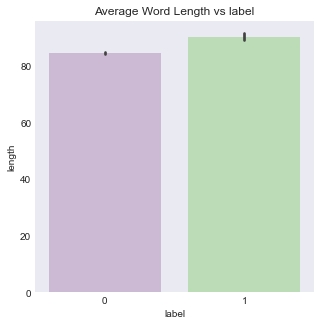

In [9]:
sns.barplot('label','length',data = train , palette='PRGn')
plt.title('Average Word Length vs label')
plt.show()

**The avarage length of both hated and normal tweets are almost equal**

#### Character Count

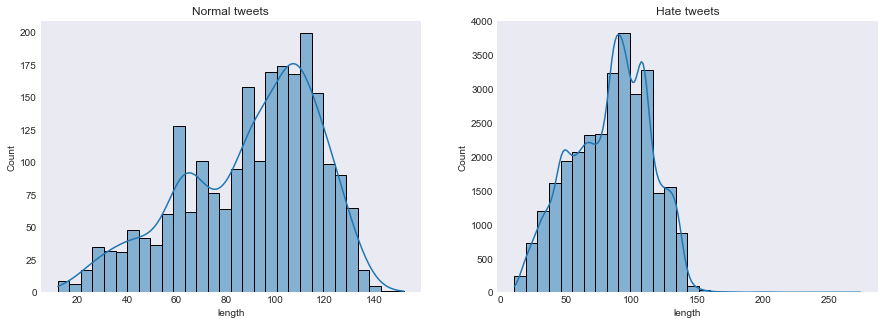

In [10]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
sns.histplot(train[train["label"] == 1]["length"],bins = 30,ax = ax1, kde=True).set(title = "Normal tweets")
sns.histplot(train[train["label"] == 0]["length"],bins = 30,ax = ax2, kde = True).set(title = "Hate tweets")
plt.show()

**In character count in  Normal tweets and Hate tweets ranges from 90 - 130. So tweets length is almost equal in both**

#### Lets see most common words used in hated tweets using wordcloud


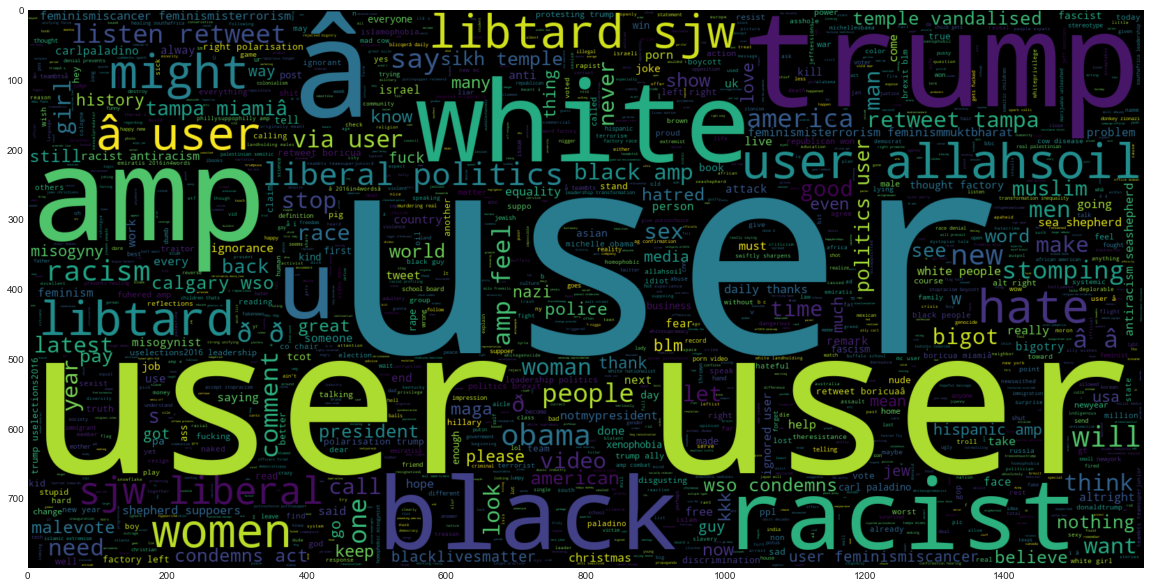

In [11]:
from wordcloud import WordCloud
plt.figure(figsize = (20,20)) # Text that is not Fake
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 ).generate(" ".join(train[train.label == 1].tweet))
plt.imshow(wc , interpolation = 'bilinear')

####  most common words used in normal tweets

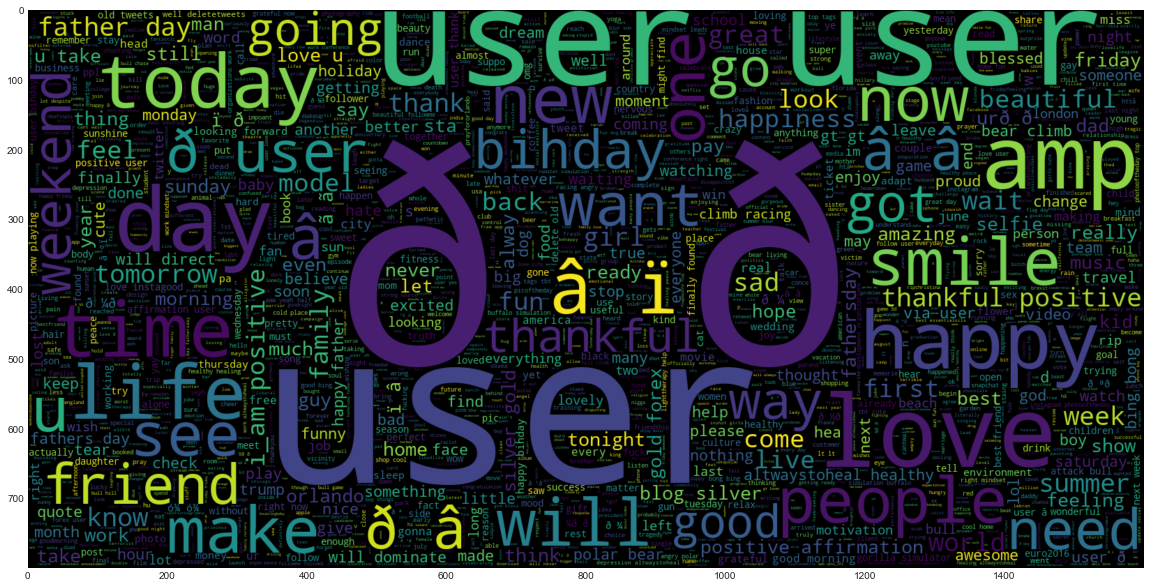

In [12]:
from wordcloud import WordCloud
plt.figure(figsize = (20,20)) # Text that is not Fake
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 ).generate(" ".join(train[train.label == 0].tweet))
plt.imshow(wc , interpolation = 'bilinear')

In [13]:
train.isnull().any()

id        False
label     False
tweet     False
length    False
dtype: bool

**I'm done with EDA**

**Lets dive into NLP to process the data**

**Importing required libraries**

In [14]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string,re
from string import punctuation
from bs4 import BeautifulSoup
from html.parser import HTMLParser
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import nltk
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Krishna
[nltk_data]     Vamshi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

In [16]:
def process_tweet(tweet):
    tweet =  " ".join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])", " ",tweet.lower()).split())
    tweet = nltk.word_tokenize(tweet)
    stemmer = PorterStemmer()
    stem = [stemmer.stem(word) for word in tweet]
    words = [word for word in stem if word not in stopwords.words('english')]
    tweet = " ".join(words)
    
    return tweet

train["clean_tweet"] = train["tweet"].apply(process_tweet)
train.head()

id  label                                              tweet  length  \
0   1      0   @user when a father is dysfunctional and is s...     102   
1   2      0  @user @user thanks for #lyft credit i can't us...     122   
2   3      0                                bihday your majesty      21   
3   4      0  #model   i love u take with u all the time in ...      86   
4   5      0             factsguide: society now    #motivation      39   

                                         clean_tweet  
0  father dysfunct selfish drag hi kid hi dysfunc...  
1  thank lyft credit use caus offer wheelchair va...  
2                                     bihday majesti  
3                        model love u take u time ur  
4                            factsguid societi motiv

#### Lets see most common words used in hated tweets after data cleaning using wordcloud

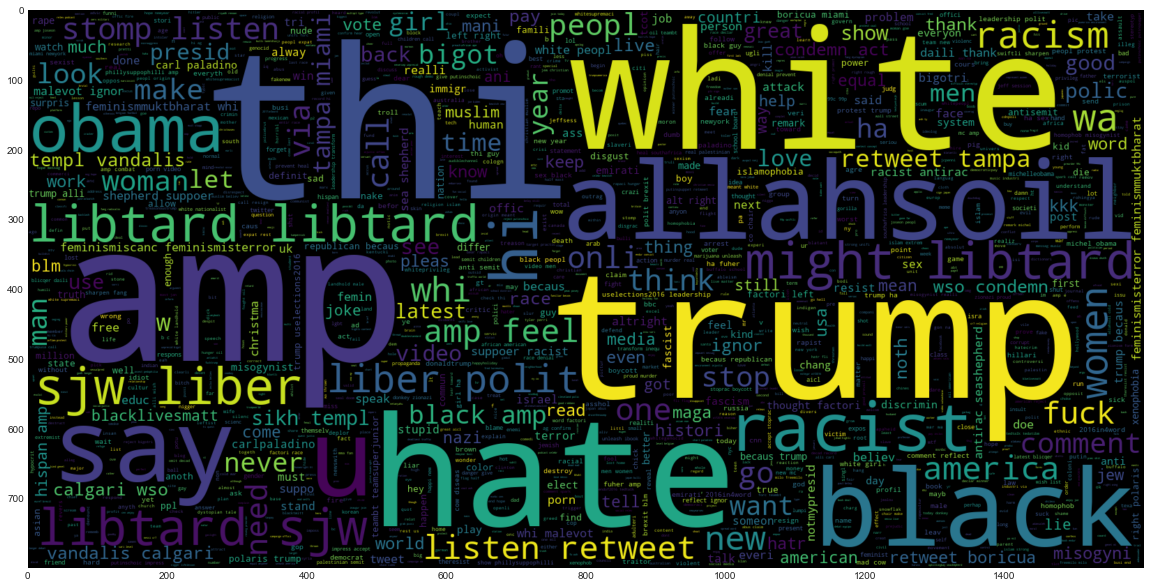

In [17]:
plt.figure(figsize = (20,20)) # Text that is not Fake
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 ).generate(" ".join(train[train.label == 1].clean_tweet))
plt.imshow(wc , interpolation = 'bilinear')

#### most common words used in normal tweets after data cleaning

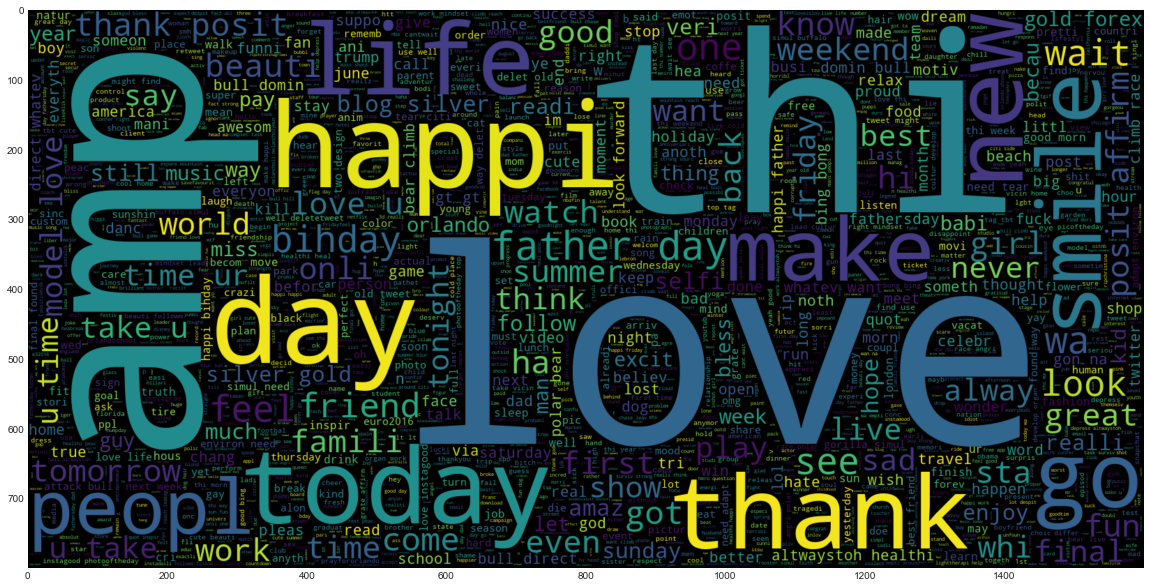

In [18]:
plt.figure(figsize = (20,20)) # Text that is not Fake
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 ).generate(" ".join(train[train.label == 0].clean_tweet))
plt.imshow(wc , interpolation = 'bilinear')

In [19]:
def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words

In [20]:
corpus = get_corpus(train.clean_tweet)
corpus[:3]

['father', 'dysfunct', 'selfish']

In [21]:
#checking the top 10 most used words in data
from collections import Counter
counter = Counter(corpus)
most_common = counter.most_common(10)
most_common = dict(most_common)
most_common

{'love': 3240,
 'day': 2852,
 'thi': 2697,
 'happi': 2105,
 'amp': 1777,
 'thank': 1580,
 'time': 1264,
 'get': 1260,
 'u': 1180,
 'life': 1170}

In [22]:
#Numerising the text using TFidfvectorizer
tfidf = TfidfVectorizer(max_features=2500)
x = tfidf.fit_transform(train['clean_tweet']).toarray()
y = train["label"]

In [23]:
#splitting the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [24]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score
nb = MultinomialNB()
nb.fit(x_train, y_train)
y_pred = nb.predict(x_test)
accuracy =accuracy_score(y_test, y_pred)
print("Accuracy score is:",accuracy)

Accuracy score is: 0.9486922788136654


In [25]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[7392,   20],
       [ 390,  189]], dtype=int64)

In [26]:
#perfoming the model 
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
rft = RandomForestClassifier(n_estimators = 300, 
                            criterion = 'entropy')
rft.fit(x_train, y_train)
y_pred = rft.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy score is:",accuracy)

Accuracy score is: 0.9593292454010762


### Evaluating model by giving some random text from data

In [40]:
test = "@user @user you don't have the balls to hashtag me as a  but you say i am to weasel away.. lumpy tony.. dipshit."
#print(clean_text)
simple_test_dtm = tfidf.transform([clean_text])
print(simple_test_dtm.toarray(), simple_test_dtm.reshape(1,-1).shape)

y_predSimpleTest_class = rft.predict(simple_test_dtm.reshape(1,-1))
if int(y_predSimpleTest_class) == 1:
    print ('Hated Tweet: {}'.format(test))
else:
    print ('Normal Tweet: {}'.format(test)) 

[[0. 0. 0. ... 0. 0. 0.]] (1, 2500)
Normal Tweet: @user @user you don't have the balls to hashtag me as a  but you say i am to weasel away.. lumpy tony.. dipshit.
